In [58]:
# Importación de librerías generales
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import time

import tensorflow as tf
from tensorflow import keras

In [2]:
# Descarga del dataset a través de Github (método aplicable a Google Colab)
url = 'https://raw.githubusercontent.com/retrospectivePreposterous/DeepLearning_EasyClassification-Regression/main/iris.csv'
iris = pd.read_csv(url)

In [3]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
# Se aislan las variables de entrada 'X' de la variable predictiva 'y'
X = iris.drop('variety', axis=1)     # Variables 'X', todas menos la etiqueta 'variedad'
y = iris['variety']                  # Variable 'y', la etiqueta 'variedad'

In [5]:
# Primero analizamos el tamaño de los datos, así como las etiquetas disponibles
print(X.shape)  
print(set(y))

(150, 4)
{'Setosa', 'Virginica', 'Versicolor'}


In [6]:
# Es necesario convertir las clases de salida en valores numéricos
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [7]:
# Finalmente, se dividen el conjunto de datos en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [8]:
model= keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=4, activation='relu')) # input_dim se corresponde con las columnas de entrada del dataset.
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(3, activation="softmax")) # la capa de salida ha de tener tantos valores como variedad de labels tiene el dataset (10).

In [9]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [10]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test)) 

Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 1.2984 - accuracy: 0.2667 - val_loss: 1.2025 - val_accuracy: 0.2667
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 1.1341 - accuracy: 0.3778 - val_loss: 1.1378 - val_accuracy: 0.2667
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0638 - accuracy: 0.4333 - val_loss: 1.0650 - val_accuracy: 0.6444
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0257 - accuracy: 0.7111 - val_loss: 1.0226 - val_accuracy: 0.6444
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9799 - accuracy: 0.7111 - val_loss: 0.9691 - val_accuracy: 0.6444
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9399 - accuracy: 0.7111 - val_loss: 0.9366 - val_accuracy: 0.6444
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8963 - accuracy: 0.7111 - val_loss: 0.8935 - val_accuracy: 0.6444
Epoch 8/100
9/9 [=========

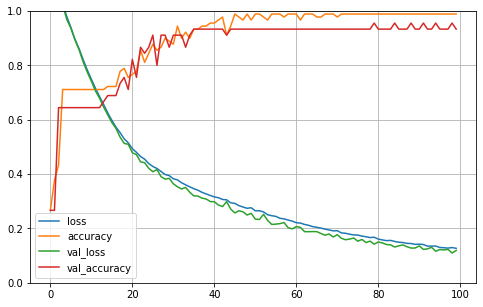

In [11]:
# Se evalúa el loss y el accuracy en la siguiente gráfica
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

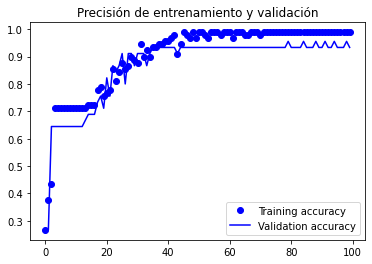

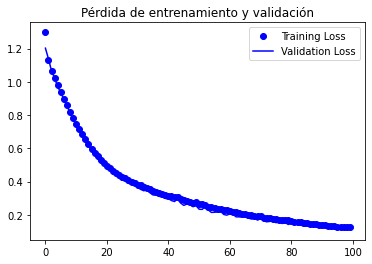

In [12]:
# De la misma manera se pueden recuperar los siguientes datos del entrenamiento
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Se imprime la precisión del entrenamiento y validación por epoch
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión de entrenamiento y validación')
plt.legend()
plt.figure()

# Se imprime la perdida de entrenamiento y validación por epoch
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Pérdida de entrenamiento y validación')
plt.legend()

plt.show()

In [13]:
y_pred = []
for i in model.predict(X):
  y_pred.append(np.argmax(i))

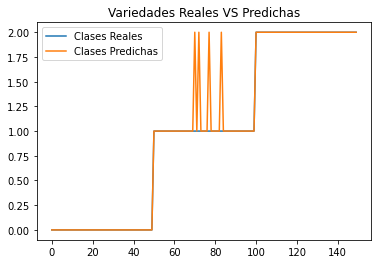

In [14]:
plt.plot(y, label='Clases Reales')
plt.plot(y_pred, label='Clases Predichas')
plt.title('Variedades Reales VS Predichas')
plt.legend()

Se confirman tres flores mal clasificadas

In [15]:
def metricas ():
    print("-----------------------------------------------------")
    print('Métricas de error:')
    print('MAE', metrics.mean_absolute_error(y, y_pred))  
    print('MSE', metrics.mean_squared_error(y, y_pred))  
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
    print("-----------------------------------------------------")
    print('Matriz de Confusión:')
    print(metrics.confusion_matrix(y, y_pred))
    print("-----------------------------------------------------")
    print('Report:')
    print(metrics.classification_report(y, y_pred))

In [16]:
metricas()

-----------------------------------------------------
Métricas de error:
MAE 0.02666666666666667
MSE 0.02666666666666667
RMSE: 0.16329931618554522
-----------------------------------------------------
Matriz de Confusión:
[[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.92      0.96        50
           2       0.93      1.00      0.96        50

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.98      0.97      0.97       150



In [130]:
# pip install shap

In [65]:
import shap

In [110]:
X_array = X.to_numpy()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model,X_array)
shap_values = explainer(X_array)

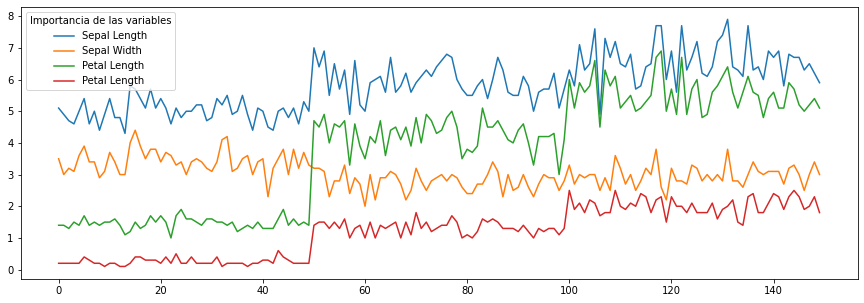

In [128]:
plt.plot(shap_values.data[:, 0], label ='Sepal Length')
plt.plot(shap_values.data[:, 1], label ='Sepal Width')
plt.plot(shap_values.data[:, 2], label ='Petal Length')
plt.plot(shap_values.data[:, 3], label ='Petal Length')

plt.legend(title="Importancia de las variables")

In [ ]:
  legend = plt.legend(*lines.legend_elements(),
                loc="upper right", title="Classes to predict")

In [40]:
# Se vuelve a iniciar la sesión
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Modelo para pares de variables, para las superficies de decisión
model_db = keras.models.Sequential()
model_db.add(keras.layers.Dense(12, input_dim=2, activation='relu')) # input_dim es 2 al tratarse de superficie de decisión.
model_db.add(keras.layers.Dense(128, activation="sigmoid"))
model_db.add(keras.layers.Dense(3, activation="softmax")) # la capa de salida ha de tener tantos valores como variedad de labels tiene el dataset (10).

model_db.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

In [52]:
plt.rcParams['figure.figsize'] = [5, 5]

def db (x1, x2):
  X_db = np.vstack((x1, x2)).T
  history_db = model_db.fit(X_db, y, epochs=100, batch_size=10, verbose=0) 

  x_min, x_max = X_db[:, 0].min()-0.1, X_db[:, 0].max()+0.1
  y_min, y_max = X_db[:, 1].min()-0.1, X_db[:, 1].max()+0.1
  h=0.01
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

  z = []
  for i in model_db.predict(np.c_[xx.ravel(),yy.ravel()]):
    z.append(np.argmax(i))
  z = np.array(z)
  z=z.reshape(xx.shape)

  surface = plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
  points = plt.scatter(x1, x2, c=y, cmap='RdBu')
  legend = plt.legend(*points.legend_elements(),
                loc="upper right", title="Classes to predict")
  plt.xlabel(x1.name)
  plt.ylabel(x2.name)

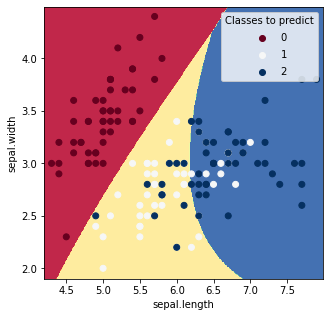

In [57]:
db (iris['sepal.length'], iris['sepal.width'])

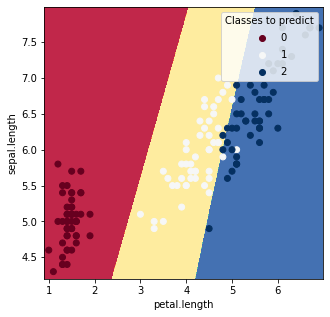

In [54]:
db (iris['petal.length'], iris['sepal.length'])

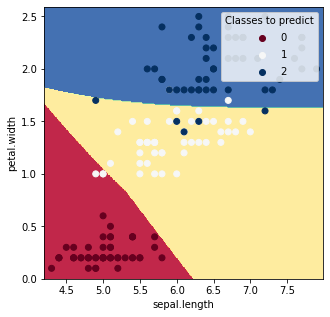

In [56]:
db (iris['sepal.length'], iris['petal.width'])